## Emel De Jesús Pedrozo Vásquez
### Analisis de datos
### Dataset Regresión Logística – Heart Disease Cleveland UCI
### Contiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc.
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

In [41]:
# Cargo las librerías necesarias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación de gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [22]:
# Lectura de datos en Python y lo cargo en la variable Datos

Datos = pd.read_csv('C:/Users/USUARIO/Tarea_3/HeartClevelandUpload.csv')

In [24]:
# Realizo lectura de los datos para el análisis exploratorio
Datos.head(297)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [651]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos Colesterol')

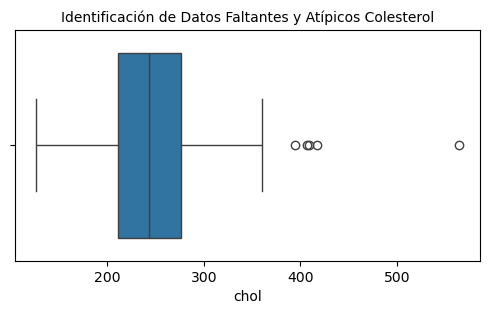

In [653]:
# Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos Colesterol', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos Presión Arterial en Reposos')

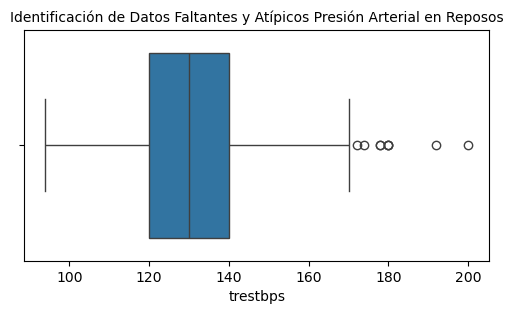

In [655]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos Presión Arterial en Reposos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos Frecuencia Cardíaca Máxima Alcanzada')

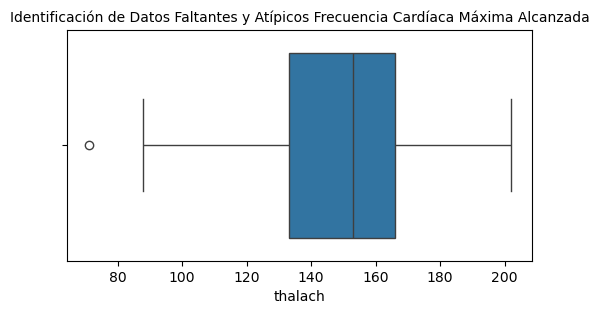

In [657]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos Frecuencia Cardíaca Máxima Alcanzada', fontsize=10 )

In [659]:
# Revisión de datos faltantes

print("Cantidad de Registros con cero en age: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en oldpeak:  96


In [661]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna

Datos['age']=Datos['age'].replace(0,Datos['age'].mean())
Datos['trestbps']=Datos['trestbps'].replace(0,Datos['trestbps'].mean())
Datos['chol']=Datos['chol'].replace(0,Datos['chol'].mean())
Datos['thalach']=Datos['thalach'].replace(0,Datos['thalach'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())

In [663]:
# Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en age: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())

Cantidad de Registros con cero en age:  0
Cantidad de Registros con cero en trestbps:  0
Cantidad de Registros con cero en chol:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en oldpeak:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos Colesterol')

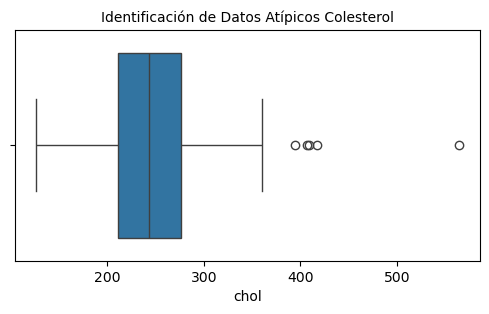

In [665]:
# Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Atípicos Colesterol', fontsize=10 )

In [667]:
nivel_minimo=50
nivel_maximo=370
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [669]:
# Filtrar Datos Atípicos
Datos=Datos[(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [671]:
# Validar si se removieron los datos atípicos
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

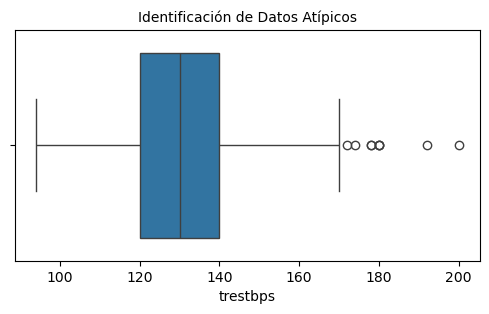

In [673]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [675]:
nivel_minimo=80
nivel_maximo=170
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 9


In [677]:
# Filtrar Datos Atípicos
Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [679]:
# Validar si se removieron los datos atípicos
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [681]:
# Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        279 non-null    int64  
 1   sex        279 non-null    int64  
 2   cp         279 non-null    int64  
 3   trestbps   279 non-null    int64  
 4   chol       279 non-null    int64  
 5   fbs        279 non-null    int64  
 6   restecg    279 non-null    int64  
 7   thalach    279 non-null    int64  
 8   exang      279 non-null    int64  
 9   oldpeak    279 non-null    float64
 10  slope      279 non-null    int64  
 11  ca         279 non-null    int64  
 12  thal       279 non-null    int64  
 13  condition  279 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.7 KB


Característica de interes:

Condition: Si la persona tiene enfermedad cardiaca o no (0 = no tiene enfermedad cardiaca - 1 = si tiene enfermedad cardiaca)


In [689]:
Datos['condition'].value_counts()

condition
0    153
1    126
Name: count, dtype: int64

In [691]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
6,0
7,1
8,0
11,1
12,1


In [693]:
# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) =25%
# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [695]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
21    38    1   0       120   231    0        0      182      1  3.800000   
56    45    0   1       130   234    0        2      175      0  0.600000   
203   60    1   3       117   230    1        0      160      1  1.400000   
150   39    0   2       138   220    0        0      152      0  1.055556   
126   50    1   2       140   233    0        0      163      0  0.600000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
82    66    0   2       146   278    0        2      152      0  1.055556   
19    42    1   0       148   244    0        2      178      0  0.800000   
99    58    1   2       105   240    0        2      154      1  0.600000   
12    59    1   0       134   204    0        0      162      0  0.800000   
217   58    1   3       146   218    0        0      105      0  2.000000   

     slope  ca  thal  
21       1   0     2  
56       1   0     0  
203   

In [697]:
print (Y_train)

21     1
56     0
203    1
150    0
126    1
      ..
82     0
19     0
99     0
12     1
217    1
Name: condition, Length: 209, dtype: int64


In [699]:
# Modelo de regresión logística
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una librería para para reolsver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de predicción
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [417]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [701]:
print (Prediccion)

[1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1]


In [703]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.93      0.81      0.87        32

    accuracy                           0.89        70
   macro avg       0.89      0.88      0.88        70
weighted avg       0.89      0.89      0.88        70



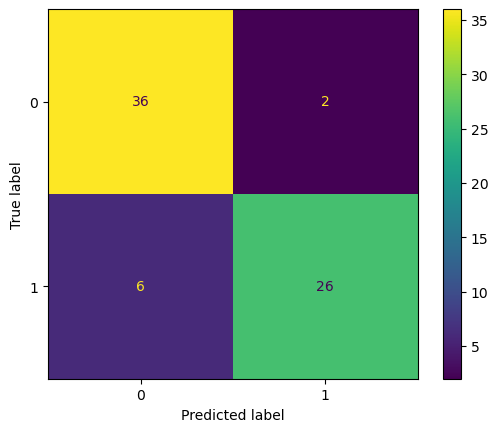

In [707]:
# Matrix de confución del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

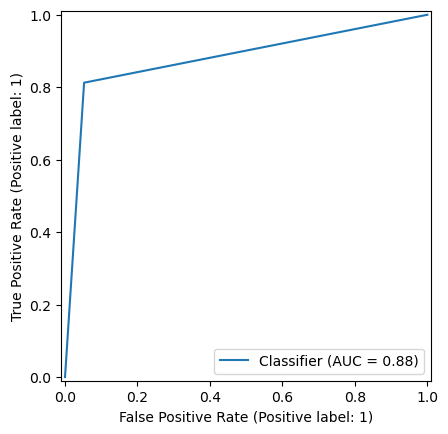

In [709]:
# curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()


Del desempeño del modelo puedo describir:

- La precisión se define como la proporción de predicciones positivas correctas en relación con todas las predicciones positivas emitidas por el modelo. Para la clase 'condition', la precisión es del 93%, lo que indica que el 93% de los casos identificados como enfermos cardíacos por el modelo resultaron ser correctos.

- El Recall, o la tasa de verdaderos positivos, representa la proporción de instancias positivas reales que fueron identificadas correctamente por el modelo entre todas las instancias positivas reales en el conjunto de datos. En el caso de la clase 'condition', el Recall es del 81%, lo que significa que el modelo identificó correctamente al 81% de todos los enfermos cardíacos en el conjunto de datos.

- El F1 Score, una medida que combina precisión y recall en una sola métrica, proporciona una evaluación equilibrada del desempeño del modelo. Para la clase 'condition', el F1 Score es de 0.87, lo que indica un equilibrio entre precisión y recall, demostrando una buena capacidad del modelo para identificar y clasificar casos de enfermedad cardíaca de manera precisa y exhaustiva.

De la Matriz de Confusión puedo inferir:

- Verdaderos negativos: Representan el número de observaciones que el clasificador predijo correctamente como falsas, con un total de 36 casos.
- Verdaderos positivos: Corresponden al número de observaciones que el clasificador predijo correctamente como verdaderas, contabilizando 26 casos correctamente identificados.
- Falsos positivos: Indican el número de observaciones que el clasificador predijo incorrectamente como verdaderas cuando en realidad eran falsas, con un total de 2 casos erróneos.
- Falsos negativos: Reflejan el número de observaciones que el clasificador predijo incorrectamente como falsas cuando en realidad eran verdaderas, sumando un total de 6 casos mal clasificados.dos.

De la Curva de Precisión del modelo puedo interpretar:

- El AUC (Área Bajo la Curva) es de 0.88, lo que indica que el 88% de las predicciones del clasificador son correctas en todos los umbrales de clasificación. Esta métrica proporciona una medida de la capacidad del modelo para discriminar entre clases positivas y negativas, donde un valor más cercano a 1 representa un mejor rendimiento del clasificador en la clasificación